In [11]:
import pandas as pd
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import seaborn as sns
from matplotlib.patches import Patch
import os

In [12]:
# More precise: replace only in the 'Valore' column
df = pd.read_csv('/home/maione/work/Capo_Granitola_24_25/meteo_CG/data_meteo/nhxnax101_MisureEn_MazVenDV_3_20251121164858.txt', sep=';', encoding='latin-1')

# Replace commas in specific column
df['Valore'] = df['Valore'].astype(str).str.replace(',', '.', regex=False)

# Convert to numeric
df['Valore'] = pd.to_numeric(df['Valore'], errors='coerce')

print("After replacing commas in Valore column:")
print(df.head())
print(f"Valore dtype: {df['Valore'].dtype}")

After replacing commas in Valore column:
           Stazione                           Grandezza Data rilevazione  \
0  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
1  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
2  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
3  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
4  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   

  Ora rilevazione  Valore  
0           00:00     0.3  
1           01:00     0.6  
2           02:00     0.4  
3           03:00     0.3  
4           04:00     0.6  
Valore dtype: float64


In [71]:
# Count NaN before dropping
nan_before = df['Valore'].isna().sum()
total_before = len(df)
print(f"Before dropping: {nan_before} NaN values out of {total_before} total rows")

# Drop rows where 'Valore' is NaN
df_clean = df.dropna(subset=['Valore'])

# Count after dropping
nan_after = df_clean['Valore'].isna().sum()
total_after = len(df_clean)
print(f"After dropping: {nan_after} NaN values out of {total_after} total rows")
print(f"Removed {nan_before - nan_after} rows")
print(f"Remaining data: {total_after} rows ({total_after/total_before*100:.1f}% of original)")

Before dropping: 489 NaN values out of 49104 total rows
After dropping: 0 NaN values out of 48615 total rows
Removed 489 rows
Remaining data: 48615 rows (99.0% of original)


In [3]:
for i, column in enumerate(df.columns):
    print(f"{i}: {column}")

0: Stazione
1: Grandezza
2: Data rilevazione
3: Ora rilevazione
4: Valore


In [9]:
# Check the actual column names
print("DataFrame columns:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

DataFrame columns:
['Stazione', 'Grandezza', 'Data rilevazione', 'Ora rilevazione', 'Valore']

First few rows:
           Stazione                           Grandezza Data rilevazione  \
0  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
1  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
2  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
3  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
4  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   

  Ora rilevazione  Valore  
0           00:00     0.3  
1           01:00     0.6  
2           02:00     0.4  
3           03:00     0.3  
4           04:00     0.6  


In [13]:
# Manual datetime conversion
df['DataOra'] = pd.to_datetime(
    df['Data rilevazione'] + ' ' + df['Ora rilevazione'], 
    dayfirst=True,  # Important for DD/MM/YYYY format
    format='%d/%m/%Y %H:%M'
)

# Verify datetime conversion
print("After datetime conversion:")
print(df[['Data rilevazione', 'Ora rilevazione', 'DataOra']].head())
print(f"\nDataOra dtype: {df['DataOra'].dtype}")

# Now extract time components
df['Year'] = df['DataOra'].dt.year
df['Month'] = df['DataOra'].dt.month
df['YearMonth'] = df['DataOra'].dt.to_period('M')



print("\nDataFrame with time components:")
print(df.head())

After datetime conversion:
  Data rilevazione Ora rilevazione             DataOra
0       01/01/2023           00:00 2023-01-01 00:00:00
1       01/01/2023           01:00 2023-01-01 01:00:00
2       01/01/2023           02:00 2023-01-01 02:00:00
3       01/01/2023           03:00 2023-01-01 03:00:00
4       01/01/2023           04:00 2023-01-01 04:00:00

DataOra dtype: datetime64[ns]

DataFrame with time components:
           Stazione                           Grandezza Data rilevazione  \
0  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
1  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
2  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
3  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   
4  Mazara del Vallo  Velocità vento 2m istantanea (m/s)       01/01/2023   

  Ora rilevazione  Valore             DataOra  Year  Month YearMonth  
0           00:00     0.3 2023-01-01 00:00:00  2023

In [14]:
# Define date range
start_date = '2024-05-01'
end_date = '2025-04-30'

# Create subset
mask = (df['DataOra'] >= start_date) & (df['DataOra'] <= end_date)
df_subset = df.loc[mask].copy()

print(f"Original data: {len(df)} rows")
print(f"Subset data: {len(df_subset)} rows")
print(f"Date range in subset: {df_subset['DataOra'].min()} to {df_subset['DataOra'].max()}")

Original data: 49104 rows
Subset data: 17474 rows
Date range in subset: 2024-05-01 00:00:00 to 2025-04-30 00:00:00


In [ ]:
df_subset['Grandezza'].head(10)

In [ ]:

df_subset.head(10)


In [15]:
# Filter for wind speed and direction data only
vv2m_df_subset = df_subset[df_subset['Grandezza'].str.contains('Velocità vento 2m istantanea', na=False)].copy()
vv2m_df_subset ['ws_2m'] = vv2m_df_subset ['Valore']
vD2m_df_subset = df_subset[df_subset['Grandezza'].str.contains('Direzione vento 2m istantanea', na=False)].copy()
vD2m_df_subset ['wd_2m'] = vD2m_df_subset ['Valore']
# Filter for wind speed
filtered_vv2m_df_subset = vv2m_df_subset[vv2m_df_subset ['ws_2m'] > 0.5]
row_count = len(filtered_vv2m_df_subset)




In [16]:
# Select only the columns you need to avoid any conflicts
wind_5_24_25 = filtered_vv2m_df_subset[['DataOra', 'ws_2m' ]].merge(
    vD2m_df_subset[['DataOra', 'wd_2m']],
    on='DataOra',
    how='inner'
)
wind_5_24_25['month'] = wind_5_24_25['DataOra'].dt.month 
print(f"wind_5_24_25 created with {len(wind_5_24_25)} rows")
print(f"vv2m_df_subset created with {len(filtered_vv2m_df_subset)} rows")
print(f"vD2m_df_subset created with {len(vD2m_df_subset)} rows")

wind_5_24_25 created with 6698 rows
vv2m_df_subset created with 6698 rows
vD2m_df_subset created with 8737 rows


In [19]:
max_windspeed = wind_5_24_25['ws_2m'].max()
max_windspeed 

np.float64(13.7)

In [29]:
wind_5_24_25.head(10)

,DataOra,ws_2m,wd_2m,month
0,2024-05-01 00:00:00,4.8,147.0,5
1,2024-05-01 01:00:00,5.5,143.0,5
2,2024-05-01 02:00:00,7.6,150.0,5
3,2024-05-01 03:00:00,5.0,148.0,5
4,2024-05-01 04:00:00,6.6,159.0,5
5,2024-05-01 05:00:00,7.2,184.0,5
6,2024-05-01 06:00:00,2.3,320.0,5
7,2024-05-01 07:00:00,1.5,319.0,5
8,2024-05-01 08:00:00,1.5,283.0,5
9,2024-05-01 09:00:00,2.4,352.0,5


In [17]:

#Prepare the Data and Calculate Wind Sectors
# Add wind direction sectors (8-point compass)
def direction_to_sector(direction):
    """Convert wind direction in degrees to 8-point compass sectors"""
    sectors = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    sector_bounds = [22.5, 67.5, 112.5, 157.5, 202.5, 247.5, 292.5, 337.5]
    
    for i, bound in enumerate(sector_bounds):
        if direction < bound:
            return sectors[i]
    return 'N'  # For directions between 337.5 and 360/0

# Apply sector classification
wind_5_24_25['Wind_Sector'] = wind_5_24_25['wd_2m'].apply(direction_to_sector)

print("Wind Sector Distribution:")
print(wind_5_24_25['Wind_Sector'].value_counts().sort_index())

Wind Sector Distribution:
Wind_Sector
E      546
N     1445
NE     508
NW    1158
S      750
SE    1422
SW     405
W      464
Name: count, dtype: int64


Figure exported as 'wind_rose_analysis_all_white.png' with 300 DPI and white background


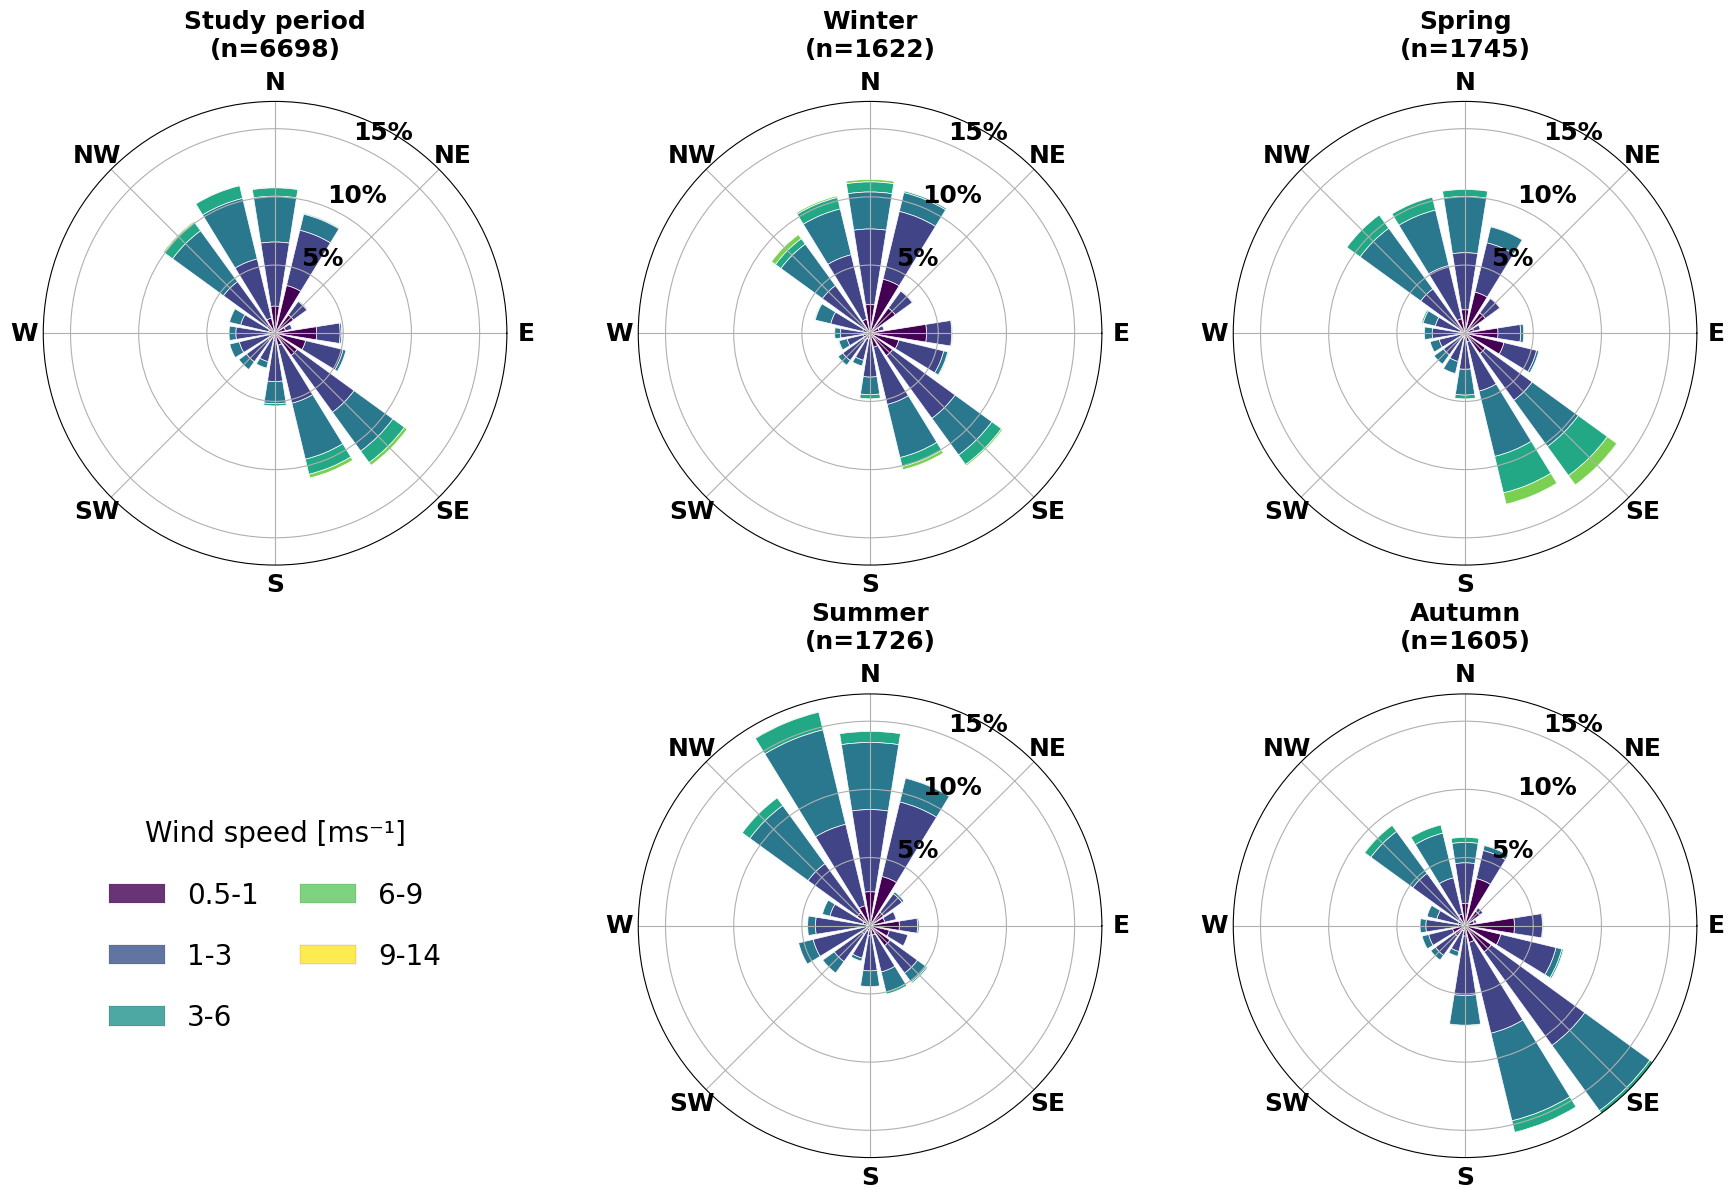

In [ ]:
def export_as_png_high_quality_all_white(df='wind_5_24_25', wind_speed_col='ws_2m', direction_col='wd_2m', datetime_col='DataOra', 
                                       filename='wind_rose_analysis.png'):
    """
    Version with white background for all subplots
    """
    # Make sure datetime column is in datetime format
    df = df.copy()
    df[datetime_col] = pd.to_datetime(df[datetime_col])
    
    # Define seasons
    def get_season(month):
        if month in [12, 1, 2]: return 'Winter'
        elif month in [3, 4, 5]: return 'Spring'
        elif month in [6, 7, 8]: return 'Summer'
        else: return 'Autumn'
    
    # Add season column
    df['season'] = df[datetime_col].dt.month.apply(get_season)
    
    # Create figure with white background
    fig = plt.figure(figsize=(18, 12), facecolor='white')
    
    # Define wind speed bins
    speed_bins = [0.5, 1,  3,  6,  9, 14]
    legend_labels = [f'{speed_bins[i]}-{speed_bins[i+1]}' for i in range(len(speed_bins)-1)]
    
    # Create custom colors
    cmap = plt.cm.viridis
    norm = plt.Normalize(vmin=0, vmax=len(speed_bins)-2)
    legend_colors = [cmap(norm(i)) for i in range(len(speed_bins)-1)]
    
    # Plot wind roses in positions 1, 2, 3, 5, 6
    plot_positions = [1, 2, 3, 5, 6]
    plot_titles = ['Study period', 'Winter', 'Spring', 'Summer', 'Autumn']
    
    for i, (pos, title) in enumerate(zip(plot_positions, plot_titles)):
        ax = plt.subplot(2, 3, pos, projection='windrose')
        ax.set_facecolor('white')  # White background for wind rose plots
        
        if title == 'Study period':
            data = df
        else:
            data = df[df['season'] == title]
        
        ws = data[wind_speed_col].values
        wd = data[direction_col].values
        
        # Filter out NaN values
        mask = ~np.isnan(ws) & ~np.isnan(wd)
        ws = ws[mask]
        wd = wd[mask]
        
        if len(ws) > 0:
            ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', 
                  linewidth=0.5, bins=speed_bins, cmap=cmap)
        
        # Set wind frequency values font size (radial labels)
        ax.set_yticks([ 5, 10, 15, 20])
        ax.set_yticklabels(['5%', '10%', '15%', '20%'], fontsize=18, fontweight='bold')
        
        # Set wind sectors/directions font size (angular labels)
        ax.set_xticklabels(['E', 'NE','N','NW' , 'W', 'SW', 'S','SE' ], fontsize=18, fontweight='bold')
        
        ax.set_ylim(0, 17)
        ax.set_title(f'{title}\n(n={len(ws)})', fontsize=18, fontweight='bold', pad=10)
    
    # Create legend in tile 4 (position 4) with two columns
    ax_legend = plt.subplot(2, 3, 4)
    ax_legend.set_facecolor('#ffffff')  # WHITE BACKGROUND
    

    # Remove axes
    ax_legend.set_xticks([])
    ax_legend.set_yticks([])
    for spine in ax_legend.spines.values():
        spine.set_visible(False)
    
    # Add title
    #ax_legend.text(0.5, 0.95, 'Legend', transform=ax_legend.transAxes,
     #             fontsize=18, fontweight='bold', ha='center', va='top')
    
    # Create legend elements
    legend_elements = [Patch(facecolor=color, edgecolor='black', linewidth=0.1, 
                           label=label, alpha=0.8) 
                      for color, label in zip(legend_colors, legend_labels)]
    
    # Create two-column legend
    legend = ax_legend.legend(
        handles=legend_elements,
        title='Wind speed [ms⁻¹]',
        loc='center',
        fontsize=20,
        title_fontsize=20,
        frameon=True,
        fancybox=True,
        shadow=False,
        facecolor='white',
        edgecolor='white',
        borderpad=1.2,
        labelspacing=1.2,
        ncol=2,
        columnspacing=1.5
    )
    
    #legend.get_title().set_fontweight('bold')
    
    # Add informative text
    #ax_legend.text(0.5, 0.05, 'Frequency circles: 0%, 5%, 10%, 15%', 
     #             transform=ax_legend.transAxes, fontsize=10, 
    #              ha='center', va='bottom', style='italic')
    
    # Main title
   # plt.suptitle('Seasonal Wind Rose Analysis', fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    
    # Export as PNG with white background
    plt.savefig(filename, 
                dpi=300,
                format='png',
                bbox_inches='tight',
                facecolor='white',
                edgecolor='none',
                transparent=False)
    
    print(f"Figure exported as '{filename}' with 300 DPI and white background")
    
    plt.show()
    return fig

# Usage with all white backgrounds:
fig = export_as_png_high_quality_all_white(wind_5_24_25, filename='wind_rose_analysis_all_white.png')

In [9]:
# Basic way to open CSV
df = pd.read_csv('/home/maione/work/Capo_Granitola_24_25/meteo_CG/Code_meteo/wind_statistics_summary.csv')

# Display basic info
print(f"Data loaded successfully!")
print(f"Shape: {df.shape} rows, {df.shape[1]} columns")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
print(df.head())

Data loaded successfully!
Shape: (5, 7) rows, 7 columns
Columns: ['Period', 'Count', 'Mean Speed (m/s)', 'Max Speed (m/s)', 'Std Speed (m/s)', 'Calm <0.5 m/s', 'Calm %']

First 5 rows:
   Period  Count  Mean Speed (m/s)  Max Speed (m/s)  Std Speed (m/s)  \
0  Winter   1622          2.384464             11.8         1.805535   
1  Spring   1745          2.940802             13.7         2.181663   
2  Summer   1726          2.359328              9.5         1.550720   
3  Autumn   1605          2.319875              9.8         1.587788   
4     All   6698          2.507450             13.7         1.821665   

   Calm <0.5 m/s  Calm %  
0              0     0.0  
1              0     0.0  
2              0     0.0  
3              0     0.0  
4              0     0.0  
